<a href="https://colab.research.google.com/github/fercho1011/Statistical-LearningII-ProyectoFinal/blob/master/CONVNET3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
cd drive/"My Drive"

/content/drive/My Drive


In [3]:
cd "Colab Notebooks"

/content/drive/My Drive/Colab Notebooks


In [4]:
cd 'Final Proyect ML2'

/content/drive/My Drive/Colab Notebooks/Final Proyect ML2


In [5]:
ls

ANN.ipynb  DATASET/  DATASET.zip  FtOrganic.npy  FtRecycled.npy  test.npy


In [0]:
import numpy as np
Organic = np.load('FtOrganic.npy', allow_pickle=True)


In [0]:
Recycled = np.load('FtRecycled.npy', allow_pickle=True)

In [0]:
Test = np.load('test.npy', allow_pickle=True)


In [9]:
from PIL import Image
image2 = Image.fromarray(Test[0])
# summarize image details
print(image2.mode)
print(image2.size)
image3 = image2.resize((150,150))

RGB
(210, 240)


In [0]:
#Reshaping Test images to 175x175 and storing into Array
maxiters = 5000
rTest = []
count = 0
for i in Test:
  img = Image.fromarray(i)
  if (np.array(img).shape[2])==3:
    rTest.append(np.asarray(img.resize((175,175)))/255)
  count +=1
  if count == maxiters:
    break

In [0]:
#Reshaping Organic images to 175x175 and storing in Array
rOrganic = []
count = 0

for i in Organic:
  img = Image.fromarray(i)
  if (np.array(img).shape[2])==3:
    rOrganic.append(np.asarray(img.resize((175,175)))/255)
  count +=1
  if count == maxiters:
    break

In [0]:
count = 0
#Reshaping Recycled images to 175x175
rRecycled = []
for i in Recycled:
  img = Image.fromarray(i)
  if (np.array(img).shape[2])==3:
    rRecycled.append(np.asarray(img.resize((175,175)))/255)
  count +=1
  if count == maxiters:
    break

In [0]:
#del rOrganic[2] #deletes inconsistent element
#del rOrganic[194] #deletes inconsistent element

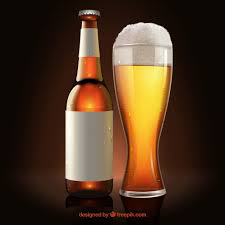

In [14]:

Image.fromarray(Recycled[2])

In [0]:
iAll = rOrganic + rRecycled #Combining all reshaped images Organic + Inorganic

In [0]:
lOrganic =np.ones(len(rOrganic))
lRecycled =np.ones(len(rRecycled))

lAll = list(lOrganic) + list(lRecycled) # Combining all labels from Organic and Recycled images

In [0]:
import random
def Split(X, Y):#Receives inputs and labels and returns 3 sets for each (training, validation and test)
  #Randomize data
  combined = list(zip(X, Y))
  random.shuffle(combined)
  
  X[:], Y[:] = zip(*combined)
  
  #Leaving 20% of the train_data/labels as the Test sets
  tsSetLen = int(0.20*len(X))
  vlSetLen = int(0.10*len(X))

  #Test set
  tsX = X[:tsSetLen] #Takes first 20% of dataset for Test
  tsY = Y[:tsSetLen] #Takes first 20% of dataset for Test

  #Training set
  trX = X[tsSetLen:(len(X)-vlSetLen)]
  trY = Y[tsSetLen:(len(Y)-vlSetLen)]
  
  #Validation set
  vlX = X[(len(X)-vlSetLen):]
  vlY = Y[(len(X)-vlSetLen):]
  
  return trX, trY, vlX, vlY, tsX, tsY  


In [0]:
trX, trY, vlX, vlY, tsX, tsY = Split(iAll, lAll)

In [19]:
len(vlY)

984

In [20]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

Using TensorFlow backend.


In [21]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), activation = 'relu', padding = 'same',input_shape=(175,175,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))    
model.add(Flatten())

# Densely connected layers
model.add(Dense(64, activation='relu'))

# Output layer
model.add(Dense(1, activation='sigmoid'))

#Compiling with ADAM optimizer & binary_crossentropy loss function
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [22]:
results = model.fit(np.array(tsX), np.array(tsY), epochs=5, batch_size=32, validation_data=(np.array(vlX), np.array(vlY)))


Train on 1969 samples, validate on 984 samples
Epoch 1/5
1969/1969 [==============================] - 12s 6ms/step - loss: 0.0096 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 2/5
1969/1969 [==============================] - 4s 2ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 3/5
1969/1969 [==============================] - 4s 2ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 4/5
1969/1969 [==============================] - 4s 2ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 5/5
1969/1969 [==============================] - 4s 2ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000


In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 175, 175, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 87, 87, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 87, 87, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 43, 43, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 43, 43, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 21, 21, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 14112)            

In [24]:
model.layers

In [25]:
from matplotlib import pyplot
# summarize filter shapes
for layer in model.layers:
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# get filter weights
	filters, biases = layer.get_weights()
	print(layer.name, filters.shape)

conv2d_1 (3, 3, 3, 32)
conv2d_2 (3, 3, 32, 32)
conv2d_3 (3, 3, 32, 32)


In [0]:
# retrieve weights from the second hidden layer
filters, biases = model.layers[4].get_weights()

In [27]:
filters.shape

(3, 3, 32, 32)

In [0]:
#normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)


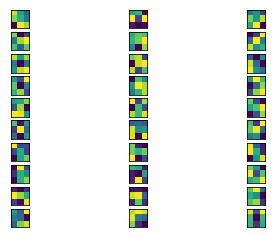

In [29]:
# plot first few filters
n_filters, ix = 10, 1
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	for j in range(3):
		#subplot
		ax = pyplot.subplot(n_filters, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		#plot filter channel
		pyplot.imshow(f[:, :, j])
		ix += 1

pyplot.show()